In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import json

In [2]:
boundary = gpd.read_file('../data/city_boundary.geojson')
major_cities = gpd.read_file('../data/USA_Major_Cities.geojson')

In [3]:
ufo_raw = pd.read_json('../data/nuforc_reports.json', lines=True)

In [4]:
ufo_raw.to_csv('../data/nuforc_raw.csv', index=False)
ufo_raw = pd.read_csv('../data/nuforc_raw.csv')

In [5]:
ufo_raw

,text,stats,date_time,report_link,city,state,country,shape,duration,summary,posted
0,MADAR Node 100,Occurred : 6/23/2019 18:53 (Entered as : 06/2...,6/23/19 18:53,http://www.nuforc.org/webreports/reports/147/S...,Mountlake Terrace,WA,USA,NaN,NaN,MADAR Node 100,6/27/19
1,Steady flashing object with three lights hover...,Occurred : 6/23/2019 20:00 (Entered as : 6/23...,6/23/19 20:00,http://www.nuforc.org/webreports/reports/147/S...,Hamden,CT,USA,Light,5 hours,Steady flashing object with three lights hover...,6/27/19
2,"Group of several orange lights, seemingly circ...",Occurred : 6/20/2019 23:28 (Entered as : 06/2...,6/20/19 23:28,http://www.nuforc.org/webreports/reports/146/S...,Charlottesville,VA,USA,Circle,15 seconds,"Group of several orange lights, seemingly circ...",6/27/19
3,Dropped in flashed a few times and shot off 5 ...,Occurred : 6/21/2019 00:00 (Entered as : 06/2...,6/21/19 00:00,http://www.nuforc.org/webreports/reports/146/S...,Lincoln Park,MI,USA,Light,2 minutes,Dropped in flashed a few times and shot off 5 ...,6/27/19
4,"Location: While traveling in a TGV, from Lill...",Occurred : 6/7/2019 20:00 (Entered as : 06/07...,6/7/19 20:00,http://www.nuforc.org/webreports/reports/146/S...,Douai (France),NaN,France,Cigar,5 minutes,"Location: While traveling in a TGV, from Lille...",6/27/19
...,...,...,...,...,...,...,...,...,...,...,...
141256,See craft every evening when I get out of work...,Occurred : 12/19/2021 23:00 (Entered as : 12/...,12/19/21 23:00,http://www.nuforc.org/webreports/reports/165/S...,Branford,CT,USA,Circle,NaN,See craft every evening when I get out of work...,12/19/21
141257,MADAR Node 70 \n \n,Occurred : 3/9/2022 00:48 (Entered as : 03/09...,3/9/22 00:48,http://www.nuforc.org/webreports/reports/167/S...,St. Louis,MO,USA,NaN,NaN,MADAR Node 70,4/22/22
141258,A very small white light hovering above the cl...,Occurred : 4/30/2013 02:19 (Entered as : 04/3...,4/30/13 02:19,http://www.nuforc.org/webreports/reports/097/S...,Batavia,IL,USA,Circle,45 seconds,A very small white light hovering above the cl...,5/15/13
141259,I was young. You know what? It was pretty ((...,Occurred : 7/21/1995 09:00 (Entered as : 07/2...,7/21/95 09:00,http://www.nuforc.org/webreports/reports/151/S...,Liberty Lake,WA,USA,Circle,1/12,I was young. You know what? It was pretty fuck...,12/19/19


In [6]:
ufo_raw.city = ufo_raw.city.astype(str)
ufo_raw.state = ufo_raw.state.astype(str)

In [7]:
ufo_raw['location'] = ''
for index, row in ufo_raw.iterrows():
    ufo_raw.loc[index, 'location'] = (row.city + ', ' + row.state)

ufo_raw

,text,stats,date_time,report_link,city,state,country,shape,duration,summary,posted,location
0,MADAR Node 100,Occurred : 6/23/2019 18:53 (Entered as : 06/2...,6/23/19 18:53,http://www.nuforc.org/webreports/reports/147/S...,Mountlake Terrace,WA,USA,NaN,NaN,MADAR Node 100,6/27/19,"Mountlake Terrace, WA"
1,Steady flashing object with three lights hover...,Occurred : 6/23/2019 20:00 (Entered as : 6/23...,6/23/19 20:00,http://www.nuforc.org/webreports/reports/147/S...,Hamden,CT,USA,Light,5 hours,Steady flashing object with three lights hover...,6/27/19,"Hamden, CT"
2,"Group of several orange lights, seemingly circ...",Occurred : 6/20/2019 23:28 (Entered as : 06/2...,6/20/19 23:28,http://www.nuforc.org/webreports/reports/146/S...,Charlottesville,VA,USA,Circle,15 seconds,"Group of several orange lights, seemingly circ...",6/27/19,"Charlottesville, VA"
3,Dropped in flashed a few times and shot off 5 ...,Occurred : 6/21/2019 00:00 (Entered as : 06/2...,6/21/19 00:00,http://www.nuforc.org/webreports/reports/146/S...,Lincoln Park,MI,USA,Light,2 minutes,Dropped in flashed a few times and shot off 5 ...,6/27/19,"Lincoln Park, MI"
4,"Location: While traveling in a TGV, from Lill...",Occurred : 6/7/2019 20:00 (Entered as : 06/07...,6/7/19 20:00,http://www.nuforc.org/webreports/reports/146/S...,Douai (France),nan,France,Cigar,5 minutes,"Location: While traveling in a TGV, from Lille...",6/27/19,"Douai (France), nan"
...,...,...,...,...,...,...,...,...,...,...,...,...
141256,See craft every evening when I get out of work...,Occurred : 12/19/2021 23:00 (Entered as : 12/...,12/19/21 23:00,http://www.nuforc.org/webreports/reports/165/S...,Branford,CT,USA,Circle,NaN,See craft every evening when I get out of work...,12/19/21,"Branford, CT"
141257,MADAR Node 70 \n \n,Occurred : 3/9/2022 00:48 (Entered as : 03/09...,3/9/22 00:48,http://www.nuforc.org/webreports/reports/167/S...,St. Louis,MO,USA,NaN,NaN,MADAR Node 70,4/22/22,"St. Louis, MO"
141258,A very small white light hovering above the cl...,Occurred : 4/30/2013 02:19 (Entered as : 04/3...,4/30/13 02:19,http://www.nuforc.org/webreports/reports/097/S...,Batavia,IL,USA,Circle,45 seconds,A very small white light hovering above the cl...,5/15/13,"Batavia, IL"
141259,I was young. You know what? It was pretty ((...,Occurred : 7/21/1995 09:00 (Entered as : 07/2...,7/21/95 09:00,http://www.nuforc.org/webreports/reports/151/S...,Liberty Lake,WA,USA,Circle,1/12,I was young. You know what? It was pretty fuck...,12/19/19,"Liberty Lake, WA"


In [8]:
boundary.head()

,name,geometry
0,"<at><openparen>Aberdeen, SD<closeparen>","LINESTRING (-99.70837 45.33235, -99.70899 45.2..."
1,"<at><openparen>Abilene, TX<closeparen>","LINESTRING (-100.15184 32.09064, -100.15191 32..."
2,"<at><openparen>Ada, OK<closeparen>","LINESTRING (-96.93259 34.76589, -96.93249 34.6..."
3,"<at><openparen>Adjuntas, PR<closeparen>","LINESTRING (-66.83723 18.19298, -66.83589 18.1..."
4,"<at><openparen>Adrian, MI<closeparen>","LINESTRING (-84.36330 42.07346, -84.36326 42.0..."


In [9]:
major_cities['location'] = ' '
for index, row in major_cities.iterrows():
    major_cities.loc[index, 'location'] = row.NAME + ', ' + row.ST
major_cities

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,geometry,location
0,1,Ammon,city,ID,16,1601990,,6,15181,13816,...,106,335,3352,3.61,4747,271,3205,1271,POINT (-111.95410 43.47579),"Ammon, ID"
1,2,Blackfoot,city,ID,16,1607840,,6,11946,11899,...,174,381,2958,3.31,4547,318,2788,1441,POINT (-112.34557 43.19394),"Blackfoot, ID"
2,3,Boise City,city,ID,16,1608830,State,8,225405,205671,...,2414,5919,50647,2.97,92700,6996,52345,33359,POINT (-116.23011 43.59901),"Boise City, ID"
3,4,Burley,city,ID,16,1611260,,6,10727,10345,...,139,358,2499,3.37,3885,241,2183,1461,POINT (-113.79329 42.53674),"Burley, ID"
4,5,Caldwell,city,ID,16,1612250,,7,53942,46237,...,686,1755,10776,3.51,16323,1428,9699,5196,POINT (-116.68562 43.66163),"Caldwell, ID"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3882,Herndon,town,VA,51,5136648,,6,23993,23292,...,306,525,5357,3.46,7813,341,4558,2914,POINT (-77.38672 38.96993),"Herndon, VA"
3882,3883,Highland Springs,Census Designated Place,VA,51,5137032,,6,16618,15711,...,206,1323,4157,3.03,6621,513,3795,2313,POINT (-77.32854 37.55172),"Highland Springs, VA"
3883,3884,Hollins,Census Designated Place,VA,51,5137880,,6,15033,14673,...,115,413,3800,2.87,6435,385,4361,1689,POINT (-79.95348 37.34338),"Hollins, VA"
3884,3885,Hopewell,city,VA,51,5138424,,6,22935,22591,...,305,1465,5877,3.00,10121,992,4906,4223,POINT (-77.29837 37.29038),"Hopewell, VA"


In [21]:
major_cities.to_file('../data/cities_saved.geojson', driver='GeoJSON')

In [10]:
boundary.shape

(864, 2)

<Axes: >

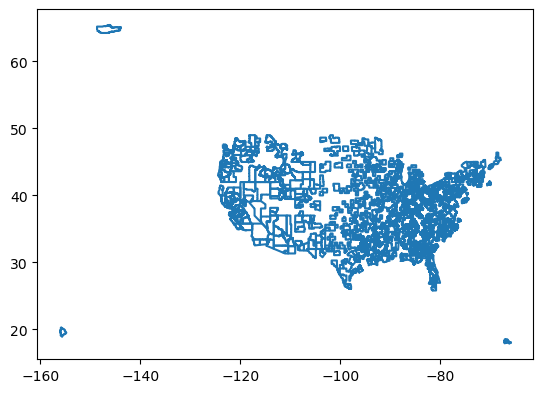

In [11]:
boundary.plot()

In [12]:
airports = pd.read_csv('../data/Airports.csv')

C:\Users\rose\AppData\Local\Temp\ipykernel_28096\2219441512.py:1: DtypeWarning: Columns (50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  airports = pd.read_csv('../data/Airports.csv')


In [13]:
airports

,the_geom,OBJECTID,Rec_Type,Site_Num,Fac_Type,Loc_Id,Eff_Date,Region_Cod,Field_Offi,State_Post,...,Position_1,Elevatio_1,Elevatio_2,Contract_F,Transient_,Other_Serv,Wind_Indic,Icao_Ident,Min_Op_Net,Filler
0,POINT (-77.08511666690545 26.51012777773246),19828,APT,90727.*A,AIRPORT,MYAM,7/16/2020,NaN,NONE,NaN,...,1/6/2010,AIP,1/6/2010,NaN,NaN,NaN,NaN,MYAM,N,NaN
1,POINT (-124.88666666664308 49.71083333275737),19748,APT,90041.*A,AIRPORT,CYQQ,7/16/2020,NaN,SEA,NaN,...,1/18/2007,OWNER,1/18/2007,NaN,NaN,NaN,NaN,CYQQ,N,NaN
2,POINT (-82.95764852760186 42.27586419409519),19812,APT,90506.*A,AIRPORT,CYQG,7/16/2020,NaN,NONE,NaN,...,9/15/2011,FAA,9/15/2011,NaN,NaN,NaN,NaN,CYQG,N,NaN
3,POINT (-104.4310672224387 40.10831555601567),2815,APT,02646.63*A,AIRPORT,CO60,7/16/2020,ANM,DEN,CO,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,N,NaN
4,POINT (-97.40537083336345 46.76386333328385),10725,APT,17285.751*A,AIRPORT,8ND5,7/16/2020,AGL,DMA,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19845,POINT (-80.71785888857967 40.093127778074376),19581,APT,26948.1*C,SEAPLANE BASE,WV43,7/16/2020,AEA,BKW,WV,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,N,NaN
19846,POINT (-81.39166666712309 39.11723444404222),19491,APT,26625.5*A,AIRPORT,2WV3,7/16/2020,AEA,BKW,WV,...,5/24/2004,OWNER,5/24/2004,NaN,NaN,NaN,Y,NaN,N,NaN
19847,POINT (-76.17777777790917 24.891702778196635),19835,APT,90742.*A,AIRPORT,MYER,7/16/2020,NaN,NONE,NaN,...,8/28/2008,AIP,3/11/2011,NaN,NaN,CARGO,NaN,MYER,N,NaN
19848,POINT (-90.38506666712107 44.772216667281015),19359,APT,27582.*A,AIRPORT,44WI,7/16/2020,AGL,CHI,WI,...,10/3/2006,OWNER,10/3/2006,NaN,NaN,NaN,NaN,NaN,N,NaN


In [14]:
airports.loc[airports['Fac_Type'] == 'AIRPORT']

,the_geom,OBJECTID,Rec_Type,Site_Num,Fac_Type,Loc_Id,Eff_Date,Region_Cod,Field_Offi,State_Post,...,Position_1,Elevatio_1,Elevatio_2,Contract_F,Transient_,Other_Serv,Wind_Indic,Icao_Ident,Min_Op_Net,Filler
0,POINT (-77.08511666690545 26.51012777773246),19828,APT,90727.*A,AIRPORT,MYAM,7/16/2020,NaN,NONE,NaN,...,1/6/2010,AIP,1/6/2010,NaN,NaN,NaN,NaN,MYAM,N,NaN
1,POINT (-124.88666666664308 49.71083333275737),19748,APT,90041.*A,AIRPORT,CYQQ,7/16/2020,NaN,SEA,NaN,...,1/18/2007,OWNER,1/18/2007,NaN,NaN,NaN,NaN,CYQQ,N,NaN
2,POINT (-82.95764852760186 42.27586419409519),19812,APT,90506.*A,AIRPORT,CYQG,7/16/2020,NaN,NONE,NaN,...,9/15/2011,FAA,9/15/2011,NaN,NaN,NaN,NaN,CYQG,N,NaN
3,POINT (-104.4310672224387 40.10831555601567),2815,APT,02646.63*A,AIRPORT,CO60,7/16/2020,ANM,DEN,CO,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,N,NaN
4,POINT (-97.40537083336345 46.76386333328385),10725,APT,17285.751*A,AIRPORT,8ND5,7/16/2020,AGL,DMA,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19844,POINT (-110.10989555604979 43.37549888888744),19623,APT,27777.11*A,AIRPORT,WY30,7/16/2020,ANM,DEN,WY,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,N,NaN
19846,POINT (-81.39166666712309 39.11723444404222),19491,APT,26625.5*A,AIRPORT,2WV3,7/16/2020,AEA,BKW,WV,...,5/24/2004,OWNER,5/24/2004,NaN,NaN,NaN,Y,NaN,N,NaN
19847,POINT (-76.17777777790917 24.891702778196635),19835,APT,90742.*A,AIRPORT,MYER,7/16/2020,NaN,NONE,NaN,...,8/28/2008,AIP,3/11/2011,NaN,NaN,CARGO,NaN,MYER,N,NaN
19848,POINT (-90.38506666712107 44.772216667281015),19359,APT,27582.*A,AIRPORT,44WI,7/16/2020,AGL,CHI,WI,...,10/3/2006,OWNER,10/3/2006,NaN,NaN,NaN,NaN,NaN,N,NaN


In [15]:
airports = airports.rename(columns = {'the_geom': 'geometry'})

In [16]:
airports

,geometry,OBJECTID,Rec_Type,Site_Num,Fac_Type,Loc_Id,Eff_Date,Region_Cod,Field_Offi,State_Post,...,Position_1,Elevatio_1,Elevatio_2,Contract_F,Transient_,Other_Serv,Wind_Indic,Icao_Ident,Min_Op_Net,Filler
0,POINT (-77.08511666690545 26.51012777773246),19828,APT,90727.*A,AIRPORT,MYAM,7/16/2020,NaN,NONE,NaN,...,1/6/2010,AIP,1/6/2010,NaN,NaN,NaN,NaN,MYAM,N,NaN
1,POINT (-124.88666666664308 49.71083333275737),19748,APT,90041.*A,AIRPORT,CYQQ,7/16/2020,NaN,SEA,NaN,...,1/18/2007,OWNER,1/18/2007,NaN,NaN,NaN,NaN,CYQQ,N,NaN
2,POINT (-82.95764852760186 42.27586419409519),19812,APT,90506.*A,AIRPORT,CYQG,7/16/2020,NaN,NONE,NaN,...,9/15/2011,FAA,9/15/2011,NaN,NaN,NaN,NaN,CYQG,N,NaN
3,POINT (-104.4310672224387 40.10831555601567),2815,APT,02646.63*A,AIRPORT,CO60,7/16/2020,ANM,DEN,CO,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,N,NaN
4,POINT (-97.40537083336345 46.76386333328385),10725,APT,17285.751*A,AIRPORT,8ND5,7/16/2020,AGL,DMA,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19845,POINT (-80.71785888857967 40.093127778074376),19581,APT,26948.1*C,SEAPLANE BASE,WV43,7/16/2020,AEA,BKW,WV,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,N,NaN
19846,POINT (-81.39166666712309 39.11723444404222),19491,APT,26625.5*A,AIRPORT,2WV3,7/16/2020,AEA,BKW,WV,...,5/24/2004,OWNER,5/24/2004,NaN,NaN,NaN,Y,NaN,N,NaN
19847,POINT (-76.17777777790917 24.891702778196635),19835,APT,90742.*A,AIRPORT,MYER,7/16/2020,NaN,NONE,NaN,...,8/28/2008,AIP,3/11/2011,NaN,NaN,CARGO,NaN,MYER,N,NaN
19848,POINT (-90.38506666712107 44.772216667281015),19359,APT,27582.*A,AIRPORT,44WI,7/16/2020,AGL,CHI,WI,...,10/3/2006,OWNER,10/3/2006,NaN,NaN,NaN,NaN,NaN,N,NaN


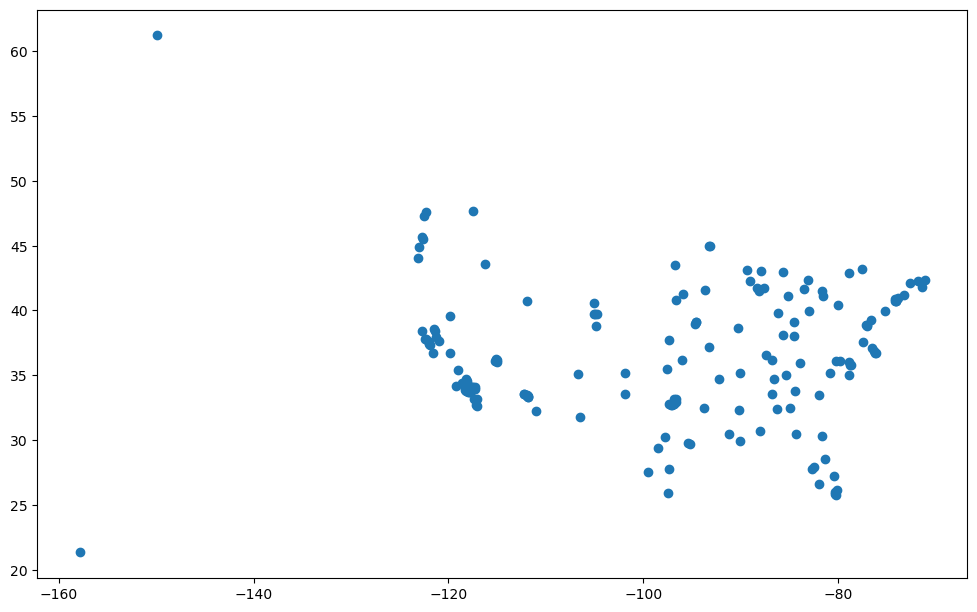

In [17]:
major_cities.loc[major_cities.POPULATION >= 150000].plot(figsize = (12, 12));

In [18]:
sightings_cities = major_cities.merge(ufo_raw, left_on = '

SyntaxError: unterminated string literal (detected at line 1) (3713021514.py, line 1)